# [240 timepoints] QC using dark cycle only for phase 1~3, 0 conc

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import os, random, re, subprocess, time

from matplotlib.pyplot import figure

from platform import python_version

print(python_version())

from scipy import stats

import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

3.7.8


In [2]:
starting_dir = os.getcwd()
print (starting_dir)

/Users/kimd999/Dropbox/script/python/srpAnalytics/code/latest/2_bmd/1_before_bmd/LPR/QC_240_timepoints/0_conc


In [3]:
# mac       - phase I, II, III - LPR - after_merging - 240 timepoints in min
complete_file_path = '/Users/kimd999/research/projects/toxicity/per_each_data/phase_I_II_III/LPR/input/phase_I_II_III_LPR_240_timepoints_morpho_filtered_min.csv'
# 383 unique chemicals, 923 unique plates

df_lpr_min = pd.read_csv(complete_file_path, header = 0)
df_lpr_min.head()
#df_LPR.shape # (72826, 29)

,chemical.id,conc,plate.id,well,t0,t1,t2,t3,t4,t5,...,t14,t15,t16,t17,t18,t19,t20,t21,t22,t23
0,1030,50.0,9414,A01,0.0,0.0,0.0,84.5,121.3,119.1,...,0.0,17.3,26.1,53.8,50.4,8.6,0.0,1.8,37.1,0.0
1,1030,35.6,9414,A02,1.2,3.0,0.0,162.1,158.4,181.6,...,5.3,37.1,121.3,153.6,203.2,24.1,2.1,0.0,38.5,112.3
2,1030,11.2,9414,A03,0.0,0.0,0.0,42.8,82.6,63.8,...,43.9,0.0,12.3,67.7,84.2,22.2,0.0,15.2,60.4,54.1
3,1030,5.0,9414,A04,2.7,1.8,6.3,17.4,41.7,9.4,...,0.0,22.2,11.7,43.3,153.7,16.6,0.0,0.0,21.8,0.0
4,1030,1.0,9414,A05,3.0,1.3,4.5,168.8,214.3,154.0,...,10.3,40.0,26.9,153.1,112.4,38.9,1.0,4.7,67.4,134.6


In [4]:
df_0_conc       = df_lpr_min.loc[df_lpr_min['conc'] == 0]
df_0_conc.head()
len(np.unique(df_0_conc['chemical.id']))

383

df_0_conc.shape:(12171, 28)
/Users/kimd999/Dropbox/script/python/srpAnalytics/code/latest/2_bmd/1_before_bmd/LPR/QC_240_timepoints_data/0_conc


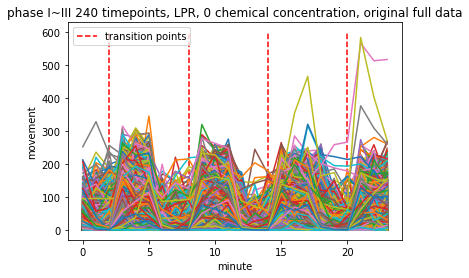

'Sanity check' took 15.2 seconds


In [5]:
start_time = time.time()

# Plot few lpr curves to check transition points
# all concentrations
time_index_start = 4 # because 0-3th columns show irrelevant values (e.g. chemical.id, conc, plate.id, well)
num_time_points = 24 # >= 25 will not make any difference

print ("df_0_conc.shape:" + str(df_0_conc.shape))
# chemical.id 414 -> (181, 29)
# all 197 chemicals that have 240 variables -> (15718, 29)

#print (df_lpr_min.iloc[:1, time_index_start:time_index_start + num_time_points]) 
# first ':' shows rows, second ':' shows columns

fig, ax = plt.subplots()

#ax.plot(np.transpose(df_0_conc.iloc[:100,time_index_start:time_index_start + num_time_points].values));
ax.plot(np.transpose(df_0_conc.iloc[:,time_index_start:time_index_start + num_time_points].values));

# save image file
cwd = os.getcwd()
print (cwd)

#array_tran = 2,8
#plt.axvline(array_tran, color='r', label='transition points', linewidth=2)

plt.vlines(x = [2, 8, 14, 20], ymin = 0,  ymax=600,
           colors = 'red', 
           label = 'transition points', linestyles='--')
plt.legend(loc="best")
plt.xlabel('minute')
plt.ylabel('movement')
plt.title('phase I~III 240 timepoints, LPR, 0 chemical concentration, original full data')
#plt.title('phase I~III 240 timepoints, LPR, 0 concentration, original first 100 data')


#plt.savefig("all_phase_LPR_240_timepoints_all_conc.png", bbox_inches="tight")
# this should be ran within same box to be effective
#print ("image file is saved")

plt.show()

end_time = time.time()
time_took = str(round((end_time-start_time), 1)) + " seconds"
print ("'Sanity check' took "+str(time_took))
# took 32 seconds for all 72,826 rows

### see near 0 rows

In [6]:
df_0_conc.head()

,chemical.id,conc,plate.id,well,t0,t1,t2,t3,t4,t5,...,t14,t15,t16,t17,t18,t19,t20,t21,t22,t23
5,1030,0.0,9414,A06,1.2,13.7,6.3,80.9,123.4,85.9,...,3.6,23.2,84.3,123.1,55.2,27.9,0.0,0.0,10.6,47.5
10,1030,0.0,9414,A12,12.2,4.9,8.6,57.4,46.4,7.9,...,0.0,22.3,21.7,27.0,0.7,1.0,0.0,0.0,53.2,0.0
16,1030,0.0,9414,B06,3.2,0.0,0.0,80.5,96.8,140.6,...,10.8,21.2,144.4,78.7,33.4,0.0,0.0,0.0,53.2,98.4
22,1030,0.0,9414,B12,0.0,0.0,0.0,26.7,44.4,30.1,...,0.0,26.2,8.4,36.8,23.7,9.5,5.5,21.0,0.0,0.0
28,1030,0.0,9414,C06,12.4,34.5,96.5,136.5,148.6,36.8,...,0.0,7.0,25.3,9.6,0.9,15.8,0.4,11.2,8.3,1.7


In [7]:
df_lpr_min_t_only = pd.DataFrame(df_0_conc.iloc[:,4:28]).astype(float)
display(df_lpr_min_t_only.head())
#print(df_lpr_min_t_only.describe())

,t0,t1,t2,t3,t4,t5,t6,t7,t8,t9,...,t14,t15,t16,t17,t18,t19,t20,t21,t22,t23
5,1.2,13.7,6.3,80.9,123.4,85.9,31.6,1.5,3.2,38.7,...,3.6,23.2,84.3,123.1,55.2,27.9,0.0,0.0,10.6,47.5
10,12.2,4.9,8.6,57.4,46.4,7.9,23.1,1.8,0.0,74.1,...,0.0,22.3,21.7,27.0,0.7,1.0,0.0,0.0,53.2,0.0
16,3.2,0.0,0.0,80.5,96.8,140.6,0.0,0.0,25.8,83.4,...,10.8,21.2,144.4,78.7,33.4,0.0,0.0,0.0,53.2,98.4
22,0.0,0.0,0.0,26.7,44.4,30.1,24.2,0.0,0.0,44.5,...,0.0,26.2,8.4,36.8,23.7,9.5,5.5,21.0,0.0,0.0
28,12.4,34.5,96.5,136.5,148.6,36.8,9.6,0.0,5.1,15.3,...,0.0,7.0,25.3,9.6,0.9,15.8,0.4,11.2,8.3,1.7


np.mean(mean_of_light):7.373495098025365
np.mean(mean_of_light_2nd_cycle_only):6.231183797656672
np.mean(mean_of_dark):40.470369020784965
np.mean(mean_of_all_periods):23.921932059405165


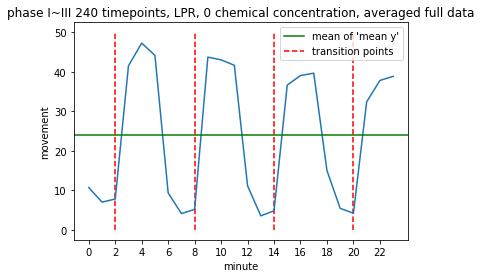

In [8]:
# (Goal): See average y values

mean_of_light = []
for i in ['t0', 't1', 't2', 't6', 't7', 't8', 't12', 't13', 't14', 't18', 't19', 't20']:
    mean_of_light.append(df_lpr_min_t_only[i].mean())
print (f"np.mean(mean_of_light):{np.mean(mean_of_light)}")


mean_of_light_2nd_cycle_only = []
for i in ['t6', 't7', 't8']:
    mean_of_light_2nd_cycle_only.append(df_lpr_min_t_only[i].mean())
print (f"np.mean(mean_of_light_2nd_cycle_only):{np.mean(mean_of_light_2nd_cycle_only)}")



mean_of_dark = []
for i in ['t3', 't4', 't5', 't9', 't10', 't11', 't15', 't16', 't17', 't21', 't22', 't23']:
    mean_of_dark.append(df_lpr_min_t_only[i].mean())
print (f"np.mean(mean_of_dark):{np.mean(mean_of_dark)}")
          
mean_of_all_periods = []
for time_point in np.arange(24):
    end_point = 't'+ str(time_point)
    mean_of_all_periods.append(df_lpr_min_t_only[end_point].mean())
print (f"np.mean(mean_of_all_periods):{np.mean(mean_of_all_periods)}")

#print (df_lpr_min_t_only.shape)
#(12171, 24)

##bool_ = [True, False]
#print (df_lpr_min_t_only[bool_])
#a=b

array_mean_all_period = df_lpr_min_t_only.mean(axis=0).to_numpy()
#display(array_mean_all_period)
x = []
for i in range(24):
    x.append(i)

plt.plot(x, array_mean_all_period)

x_labels = []
for i in range(24):
    x_labels.append(i)

plt.xticks(np.arange(min(x), max(x)+1, 2))

plt.xlabel("minute")
plt.ylabel("movement")
plt.title('phase I~III 240 timepoints, LPR, 0 chemical concentration, averaged full data')
plt.axhline(label='mean of \'mean y\'', y=array_mean_all_period.mean(), xmin=min(x), xmax=max(x), color='g')

plt.vlines(x = [2, 8, 14, 20], ymin = 0,  ymax=50,
           colors = 'red', 
           label = 'transition points', linestyles='--')
plt.legend()

l = plt.legend(loc ="best")
l.set_zorder(2.5)

plt.show()

In [9]:
# (Goal) Define function to do QC near 0 plate per fish

def count_near_0_per_plate_counting_each_fish(array_lpr_min_t_only):
    
    threshold = 6.23 # mean of light period during the 2nd cycle
    
    #print(f"\narray_lpr_min_t_only.shape:{array_lpr_min_t_only.shape}")
    #print(f"array_lpr_min_t_only[:1]:{array_lpr_min_t_only[:1]}")
    array_lpr_min_t_only_flattened = array_lpr_min_t_only.flatten()
    count_lt_threshold = 0
    count_gt_threshold = 0
    #print(f"array_lpr_min_t_only_flattened.shape:{array_lpr_min_t_only_flattened.shape}")
    for i in range(len(array_lpr_min_t_only_flattened)):
        if (array_lpr_min_t_only_flattened[i] < threshold):
            count_lt_threshold += 1
        else:
            count_gt_threshold += 1
    
#     print (f"count_lt_threshold:{count_lt_threshold}")
#     print (f"count_gt_threshold:{count_gt_threshold}")
    
    df_per_count = pd.DataFrame({'count': [count_lt_threshold, count_gt_threshold]},
                  index=['(>75%) y < 5', '(>75%) y >= 5'])

#     i = [0]
#     def absolute_value(val):
#         a  = df_per_count.iloc[i[0]%len(df_per_count),i[0]//len(df_per_count)]
#         i[0] += 1
#         return a
            
    '''
    # keep this for drawing fig
    my_explode=(0,0.1)
    plot = df_per_count.plot.pie(title="fish counts", y='count', figsize=(5, 5),
                        explode=my_explode, autopct='%1.1f%%')
    plot = df_per_count.plot.pie(title="fish counts", y='count', figsize=(5, 5),
                        explode=my_explode, autopct=absolute_value)

    try:
        largest_file_index = 0
        files = [f for f in os.listdir('.') if os.path.isfile(f)]
        for f_name in files:
            if 'pie' in f_name:
                #print (f_name)
                splited_f_name = f_name.split('.png')
                splited_f_name2 = splited_f_name[0].split('pie-')
                if (int(splited_f_name2[1])) > largest_file_index:
                    largest_file_index = (int(splited_f_name2[1]))
                    
        output_f_name = 'pie-' + str(largest_file_index+1) + '.png'
        plot.figure.savefig(output_f_name)
                
    except:
        plot.figure.savefig('pie-001.png')
    '''     
    
    
    array_t = []
    for i in range(24):
        if i in [9,10,11]:
            array_t.append(i)
    #print(array_t)


    # just to draw plot per row
    if count_lt_threshold > (count_lt_threshold+count_gt_threshold)*0.75:
        '''
        show_count = 0
        for i in range(len(array_lpr_min_t_only)):
            array_lpr_min_t_only_per_row = array_lpr_min_t_only[i]
            plt.plot(array_t, array_lpr_min_t_only_per_row, color='cyan', linestyle='-')

            plt.xlabel("minute")
            plt.ylabel("movement")
            plt.title("(most 'movement < threshold') Individual movement of fish per minute (negative ctrl data only)")

            plt.vlines(x = [2, 8, 14, 20], ymin = 0,  ymax=150,
                   colors = 'red', 
                   label = 'transition points', linestyles='--')
            plt.legend()
            plt.xticks(np.arange(0, 23, step=3))
            plt.xlim(0, 23)
            #plt.ylim(bottom, top)
            
            plt.show()
            show_count += 1
            if show_count > 4:
                break
        '''
        return "mostly_lt_threshold"

    else: # not 'mostly < 5'
        '''
        show_count = 0
        for i in range(len(array_lpr_min_t_only)):
            array_lpr_min_t_only_per_row = array_lpr_min_t_only[i]
            #print (f"array_lpr_min_t_only_per_row.shape:{array_lpr_min_t_only_per_row.shape}")
            plt.plot(array_t, array_lpr_min_t_only_per_row, color='cyan', linestyle='-')

            plt.xlabel("minute")
            plt.ylabel("movement")
            plt.title("(NOT most 'movement < threshold') Individual movement of fish per minute (negative control data only)")
            
            #current_ylim = plt.get_ylim()
            #print (f"current_ylim:{current_ylim}")
            
            plt.vlines(x = [2, 8, 14, 20], ymin = 0,  ymax=150,
                   colors = 'red', 
                   label = 'transition points', linestyles='--')
            plt.legend()
            plt.xticks(np.arange(0, 23, step=3))
            plt.xlim(0, 23)
            plt.show()
            show_count += 1
            if show_count > 4:
                break
        '''
        return "not_mostly_lt_threshold"
# (Goal) Define function to do QC near 0 plate per fish

/Users/kimd999/Dropbox/script/python/srpAnalytics/code/latest/2_bmd/1_before_bmd/LPR/QC_240_timepoints_data/0_conc
array_chemical_with_any_plate_of_mostly_lt_threshold:[53, 54, 56, 57, 58, 60, 61, 62, 63, 64, 65, 66, 67, 69, 70, 129, 155, 220, 227, 234, 246, 247, 248, 250, 251, 252, 275, 280, 281, 283, 285, 286, 295, 296, 297, 360, 365, 381, 384, 385, 392, 397, 404, 406, 409, 412, 414, 415, 416, 417, 418, 419, 420, 441, 443, 447, 448, 467, 500, 501, 502, 503, 504, 505, 511, 512, 513, 514, 515, 517, 588, 595, 596, 597, 601, 602, 609, 618, 622, 628, 629, 660, 667, 674, 689, 691, 692, 694, 696, 697, 699, 721, 722, 725, 726, 741, 746, 747, 768, 769, 770, 771, 774, 775, 776, 777, 778, 946, 947, 948, 949, 952, 955, 961, 965, 966, 998, 1016, 1017, 1030, 1031, 1105, 1114, 1155, 1161, 1163, 1166, 1171, 1172, 1174, 1175, 1176, 1177, 1178, 1179, 1180, 1182, 1189, 1209, 1211, 1213, 1214, 1215, 1216, 1220, 1221, 1222, 1241, 1307, 1312, 1315, 1316, 1354, 1370, 1371, 1430, 1449, 1595, 1601, 1603, 160

,Condition,Count
0,# of plates NOT most 'movement < threshold',892
1,# of plates most 'movement < threshold',31


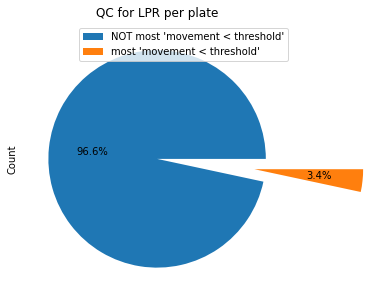

In [15]:
## (Goal) Use function to see near 0 fish per chemical and plate
## (how) Apply 'mean movement of light period of 2nd cycle' to 'dark period of 2nd cycle' only


full_devel = "full"
#full_devel = "devel"


if (full_devel == "full"):
    chemical_id_from_here = np.unique(df_0_conc['chemical.id'])
else:
    #chemical_id_from_here = [53, 1595]
    chemical_id_from_here = [1030]

dic_per_chemical_plate = {}
array_chemical_with_any_plate_of_mostly_lt_threshold = []

f_out = open("LPR_240_timepoints_chemical_plate_by_QC.csv", 'w')
f_out.write("chemical,plate,LPR_QC_verdict\n")
for chemical_id in chemical_id_from_here:
    #print("\nchemical_id:\n" + str(chemical_id))
    
    df_lpr_min_per_chemical_id = df_0_conc.loc[df_0_conc['chemical.id'] == chemical_id]
    
    plate_id_from_here = np.unique(df_lpr_min_per_chemical_id['plate.id'])
    #print (plate_id_from_here)
    chemical_is_affected = False
    for plate_id in plate_id_from_here:
        #print("\nplate_id:\n" + str(plate_id))
        df_lpr_min_per_chemical_id_plate_id = df_lpr_min_per_chemical_id.loc[df_lpr_min_per_chemical_id['plate.id']\
                                                                             == plate_id]
        df_lpr_min_per_chemical_id_plate_id_t_only = pd.DataFrame(df_lpr_min_per_chemical_id_plate_id.iloc[:,4:28])
        
        df_lpr_min_per_chemical_id_plate_id_t_only_dark \
             = df_lpr_min_per_chemical_id_plate_id_t_only.drop\
             (df_lpr_min_per_chemical_id_plate_id_t_only.columns[[0,1,2, 3,4,5, 6,7,8,    12,13,14, 15,16,17, 18,19,20, 21,22,23]], axis=1)
        
        array_lpr_min_per_chemical_id_plate_id_t_only_dark = df_lpr_min_per_chemical_id_plate_id_t_only_dark.to_numpy()
        
        verdict = count_near_0_per_plate_counting_each_fish(array_lpr_min_per_chemical_id_plate_id_t_only_dark)
        
        #print(f"chemical_id: {chemical_id}, plate_id: {plate_id} -> {verdict}")
        
        combi = (str(chemical_id), str(plate_id))
        dic_per_chemical_plate[combi] = verdict
        
        if (verdict == 'mostly_lt_threshold'):
            chemical_is_affected = True
            write_this = str(chemical_id) + "," + str(plate_id) + "," + "fail\n"
            f_out.write(write_this)
        else:
            chemical_is_affected = True
            write_this = str(chemical_id) + "," + str(plate_id) + "," + "pass\n"
            f_out.write(write_this)
            

    if (chemical_is_affected == True):
        array_chemical_with_any_plate_of_mostly_lt_threshold.append(chemical_id)
### end of for chemical_id in chemical_id_from_here:  
f_out.close()

cwd = os.getcwd()
print (cwd)

print (f"array_chemical_with_any_plate_of_mostly_lt_threshold:{array_chemical_with_any_plate_of_mostly_lt_threshold}")

number_of_chemical_plate_not_mostly_lt_threshold = sum(map(('not_mostly_lt_threshold').__eq__, dic_per_chemical_plate.values()))
number_of_chemical_plate_mostly_lt_threshold     = sum(map(('mostly_lt_threshold').__eq__, dic_per_chemical_plate.values()))

data = [['# of plates NOT most \'movement < threshold\'', number_of_chemical_plate_not_mostly_lt_threshold], 
        ['# of plates most \'movement < threshold\'', number_of_chemical_plate_mostly_lt_threshold]]

df_result = pd.DataFrame(data, columns = ['Condition', 'Count'], index=None)


i = [0]
def absolute_value(df):
    a  = df.iloc[i[0]%len(df),i[0]//len(df)]
    i[0] += 1
    return a
    
#df_per_count = pd.DataFrame({'count': [mostly_lt_threshold, not_mostly_lt_threshold]},
#              index=['(>75%) y < 5', '(>75%) y >= 5'])
    
#df_result = df_result.drop['index']

display(df_result)

my_explode=(0,0.9)
plot = df_result.plot.pie(title="QC for LPR per plate", y='Count', figsize=(5, 5),
                   explode=my_explode, autopct='%1.1f%%', labels=['', ''])

#plot = df_result.plot.pie(title="QC for LPR per plate", y='Count', figsize=(5, 5),
#                        explode=my_explode, autopct=absolute_value(df_result))

labels = ['NOT most \'movement < threshold\'', 'most \'movement < threshold\'']
plt.legend(labels, loc="best")
plt.show()
## (Goal) Use function to see near 0 fish per chemical and plate
## (how) Apply 'mean movement of light period of 2nd cycle' to 'dark period of 2nd cycle' only


,Condition,Count
0,# of chemicals without any QC failed plate,382
1,# of chemicals with 1 or more QC failed plate,1


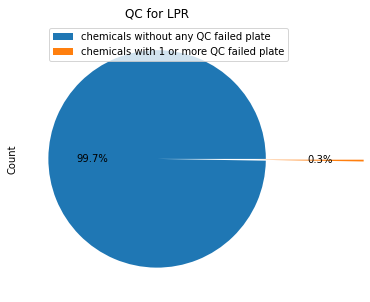

In [11]:
# (Goal) Show % of affected chemicals
data = [['# of chemicals without any QC failed plate', \
         (len(np.unique(df_0_conc['chemical.id']))-len(array_chemical_with_any_plate_of_mostly_lt_threshold))], 
        ['# of chemicals with 1 or more QC failed plate', \
         len(array_chemical_with_any_plate_of_mostly_lt_threshold)]]

df_result = pd.DataFrame(data, columns = ['Condition', 'Count'], index=None)


i = [0]
def absolute_value(df):
    a  = df.iloc[i[0]%len(df),i[0]//len(df)]
    i[0] += 1
    return a
    
#df_per_count = pd.DataFrame({'count': [mostly_lt_threshold, not_mostly_lt_threshold]},
#              index=['(>75%) y < 5', '(>75%) y >= 5'])
    
#df_result = df_result.drop['index']

display(df_result)

my_explode=(0,0.9)
plot = df_result.plot.pie(title="QC for LPR", y='Count', figsize=(5, 5),
                   explode=my_explode, autopct='%1.1f%%', labels=['', ''])

#plot = df_result.plot.pie(title="QC for LPR per plate", y='Count', figsize=(5, 5),
#                        explode=my_explode, autopct=absolute_value(df_result))

labels = ['chemicals without any QC failed plate', 'chemicals with 1 or more QC failed plate']
plt.legend(labels, loc="best")
plt.show()
# (Goal) Show % of affected chemicals

In [ ]:
a=b

array_chemical_with_any_plate_of_mostly_lt_threshold:[]


,Condition,Count
0,number_of_plates NOT 'mostly < threshold',2
1,number_of_plates 'mostly < threshold',0


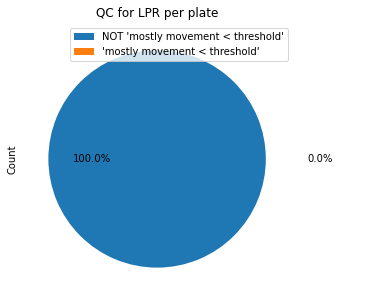

In [12]:
## (Goal) Use function to see near 0 fish per chemical and plate
# Use all 1~4 dark cycles

#full_devel = "full"
full_devel = "devel"

if (full_devel == "full"):
    chemical_id_from_here = np.unique(df_0_conc['chemical.id'])
else:
    #chemical_id_from_here = [53, 1595]
    chemical_id_from_here = [53]

dic_per_chemical_plate = {}
array_chemical_with_any_plate_of_mostly_lt_threshold = []

for chemical_id in chemical_id_from_here:
    #print("\nchemical_id:\n" + str(chemical_id))
    
    df_lpr_min_per_chemical_id = df_0_conc.loc[df_0_conc['chemical.id'] == chemical_id]
    
    plate_id_from_here = np.unique(df_lpr_min_per_chemical_id['plate.id'])
    #print (plate_id_from_here)
    chemical_is_affected = False
    for plate_id in plate_id_from_here:
        #print("\nplate_id:\n" + str(plate_id))
        df_lpr_min_per_chemical_id_plate_id = df_lpr_min_per_chemical_id.loc[df_lpr_min_per_chemical_id['plate.id']\
                                                                             == plate_id]
        df_lpr_min_per_chemical_id_plate_id_t_only = pd.DataFrame(df_lpr_min_per_chemical_id_plate_id.iloc[:,4:28])
        
        df_lpr_min_per_chemical_id_plate_id_t_only_dark \
            = df_lpr_min_per_chemical_id_plate_id_t_only.drop\
            (df_lpr_min_per_chemical_id_plate_id_t_only.columns[[0,1,2, 6,7,8, 12,13,14, 18,19,20]], axis=1)
        
#         df_lpr_min_per_chemical_id_plate_id_t_only_dark \
#             = df_lpr_min_per_chemical_id_plate_id_t_only.drop\
#             (df_lpr_min_per_chemical_id_plate_id_t_only.columns[[0,1,2, 6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23]], axis=1)
        
        array_lpr_min_per_chemical_id_plate_id_t_only_dark = df_lpr_min_per_chemical_id_plate_id_t_only_dark.to_numpy()
        
        #verdict = count_near_0_per_plate_counting_by_row(array_lpr_min_per_chemical_id_plate_id_t_only)
        verdict = count_near_0_per_plate_counting_each_fish(array_lpr_min_per_chemical_id_plate_id_t_only_dark)
        
        #print(f"chemical_id: {chemical_id}, plate_id: {plate_id} -> {verdict}")
        
        combi = (str(chemical_id), str(plate_id))
        dic_per_chemical_plate[combi] = verdict
        
        if (verdict == 'mostly_lt_threshold'):
            chemical_is_affected = True

    if (chemical_is_affected == True):
        array_chemical_with_any_plate_of_mostly_lt_threshold.append(chemical_id)
### end of for chemical_id in chemical_id_from_here:  
        
print (f"array_chemical_with_any_plate_of_mostly_lt_threshold:{array_chemical_with_any_plate_of_mostly_lt_threshold}")

number_of_chemical_plate_not_mostly_lt_threshold = sum(map(('not_mostly_lt_threshold').__eq__, dic_per_chemical_plate.values()))
number_of_chemical_plate_mostly_lt_threshold     = sum(map(('mostly_lt_threshold').__eq__, dic_per_chemical_plate.values()))

data = [['number_of_plates NOT \'mostly < threshold\'', number_of_chemical_plate_not_mostly_lt_threshold], 
        ['number_of_plates \'mostly < threshold\'', number_of_chemical_plate_mostly_lt_threshold]]

df_result = pd.DataFrame(data, columns = ['Condition', 'Count'], index=None)


i = [0]
def absolute_value(df):
    a  = df.iloc[i[0]%len(df),i[0]//len(df)]
    i[0] += 1
    return a
    
#df_per_count = pd.DataFrame({'count': [mostly_lt_threshold, not_mostly_lt_threshold]},
#              index=['(>75%) y < 5', '(>75%) y >= 5'])
    
#df_result = df_result.drop['index']

display(df_result)

my_explode=(0,0.9)
plot = df_result.plot.pie(title="QC for LPR per plate", y='Count', figsize=(5, 5),
                   explode=my_explode, autopct='%1.1f%%', labels=['', ''])

#plot = df_result.plot.pie(title="QC for LPR per plate", y='Count', figsize=(5, 5),
#                        explode=my_explode, autopct=absolute_value(df_result))

labels = ['NOT \'mostly movement < threshold\'', '\'mostly movement < threshold\'']
plt.legend(labels, loc="best")
plt.show()
## (Goal) Use function to see near 0 fish per chemical and plate
# Use all 1~4 dark cycles

,Condition,Count
0,number_of_chemicals NOT 'mostly < threshold',379
1,number_of_chemicals 'mostly < threshold',4


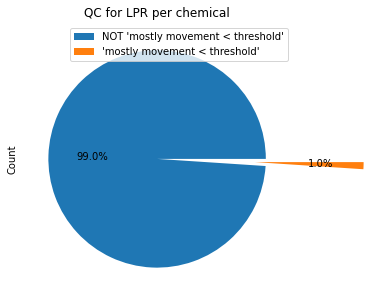

In [13]:
## (Goal) Use function to see near 0 fish per chemical

full_devel = "full"
#full_devel = "devel"

if (full_devel == "full"):
    chemical_id_from_here = np.unique(df_0_conc['chemical.id'])
else:
    #chemical_id_from_here = [53, 1595]
    chemical_id_from_here = [53]

dic_per_chemical = {}

for chemical_id in chemical_id_from_here:
    #print("\nchemical_id:\n" + str(chemical_id))
    
    df_lpr_min_per_chemical_id = df_0_conc.loc[df_0_conc['chemical.id'] == chemical_id]

    df_lpr_min_per_chemical_id_t_only = pd.DataFrame(df_lpr_min_per_chemical_id.iloc[:,4:28])

    df_lpr_min_per_chemical_id_t_only_dark \
        = df_lpr_min_per_chemical_id_t_only.drop\
        (df_lpr_min_per_chemical_id_t_only.columns[[0,1,2, 6,7,8, 12,13,14, 18,19,20]], axis=1)

    array_lpr_min_per_chemical_id_t_only_dark = df_lpr_min_per_chemical_id_t_only_dark.to_numpy()

    #verdict = count_near_0_per_plate_counting_by_row(array_lpr_min_per_chemical_id_t_only)
    verdict = count_near_0_per_plate_counting_each_fish(array_lpr_min_per_chemical_id_t_only_dark)

    #print(f"chemical_id: {chemical_id} -> {verdict}")

    dic_per_chemical[chemical_id] = verdict

number_of_chemical_not_mostly_lt_threshold = sum(map(('not_mostly_lt_threshold').__eq__, dic_per_chemical.values()))
number_of_chemical_mostly_lt_threshold     = sum(map(('mostly_lt_threshold').__eq__, dic_per_chemical.values()))


data = [['number_of_chemicals NOT \'mostly < threshold\'', number_of_chemical_not_mostly_lt_threshold], 
        ['number_of_chemicals \'mostly < threshold\'', number_of_chemical_mostly_lt_threshold]]

df_result = pd.DataFrame(data, columns = ['Condition', 'Count'], index=None)


i = [0]
def absolute_value(df):
    a  = df.iloc[i[0]%len(df),i[0]//len(df)]
    i[0] += 1
    return a
    
#df_per_count = pd.DataFrame({'count': [mostly_lt_threshold, not_mostly_lt_threshold]},
#              index=['(>75%) y < 5', '(>75%) y >= 5'])
    
#df_result = df_result.drop['index']

display(df_result)

my_explode=(0,0.9)
plot = df_result.plot.pie(title="QC for LPR per chemical", y='Count', figsize=(5, 5),
                   explode=my_explode, autopct='%1.1f%%', labels=['', ''])

#plot = df_result.plot.pie(title="QC for LPR per plate", y='Count', figsize=(5, 5),
#                        explode=my_explode, autopct=absolute_value(df_result))

labels = ['NOT \'mostly movement < threshold\'', '\'mostly movement < threshold\'']
plt.legend(labels, loc="best")
plt.show()